# Event Related Responses
In this Jupyter notebook, I'll provide a quick introduction to **evoke responses**, aiming to help you develop a basic understanding of this concept. By the end of this tutorial, you'll have gained an intuition into evoke responses and their underlying principles.

## Simulating data

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import mne
%matplotlib inline

In [15]:
sampfreq = 1000
prestim = .1
times = np.arange(400, dtype=np.float64) / sampfreq - prestim

def data_fun(times, ntrials = 100, noiselevel = 1, jitterlevel = .5): #Ntrials + some noise
    """Generate random source time courses. Sine multiplied by exponent.
        ntrials = number of trials
        noiselevel: multiples of std of signal
        jitterlevel: shift of sine in radians (full cycle 2pi)""" #APADT TO GENERATE A MATRIX
    
    rawtrials = np.zeros((ntrials, len(times)))
    
    for i in range(ntrials):
        #sourcewave = np.sin(50.0 * times) * np.exp(-((times - np.random.normal(.1, jitterlevel)) ** 2) / 0.01)
        sourcewave = np.sin(50.0 * times - np.random.normal(0, jitterlevel)) * np.exp(-((times - .1) ** 2) / 0.01)
        noisewave = np.random.normal(0, np.std(sourcewave) * noiselevel, len(sourcewave))
        rawtrials[i,] = sourcewave + noisewave

    return rawtrials


In [16]:
test = data_fun(times, ntrials = 20, noiselevel = 2, jitterlevel= .5)

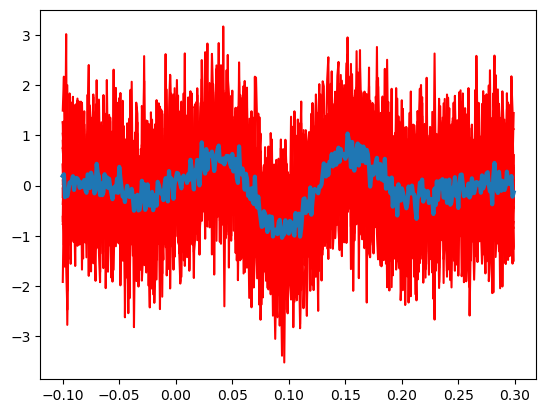

In [4]:
plt.plot(times.T, test.T, color = 'red')
plt.plot(times.T, np.mean(test.T, axis=1), linewidth = 3)
plt.show()

## Real Data

In [17]:
#get sample info

info = mne.io.read_info("sample-info.fif", verbose = True)
info = mne.Info(info, sfreq=100)

In [18]:
print(info)

<Info | 23 non-empty values
 acq_pars: ACQactiveGround 0 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, IASX+, IASX-, IASY+, IASY-, IASZ+, ...
 chs: 2 EOG, 1 ECG, 11 IAS, 102 Magnetometers, 204 Gradiometers, 2 misc, 18 Stimulus, 1 SYST
 custom_ref_applied: False
 description: TRIUX system at Salzburg-3122
 dev_head_t: MEG device -> head transform
 dig: 313 items (3 Cardinal, 5 HPI, 305 Extra)
 experimenter: meg (meg)
 file_id: 4 items (dict)
 gantry_angle: 60.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2022-05-18 07:29:56 UTC
 meas_id: 4 items (dict)
 nchan: 341
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: fs_sbg_hearing
 projs: []
 sfreq: 100.0 Hz
 subject_info: 6 items (dict)
>


In [19]:
datapath = "/Users/b1019548/Library/CloudStorage/OneDrive-UniversitätSalzburg/Teaching/Master_VO_MethodsCogNeuro/Lecture1/data/data_sub3_preproc_gp.mat"

epochs = mne.read_epochs_fieldtrip(datapath, info)

Adding metadata with 2 columns
16000 matching events found
No baseline correction applied


In [20]:
evoked = epochs.average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [21]:

evoked.plot();


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x300 with 2 Axes>

In [10]:
test=evoked.get_data()


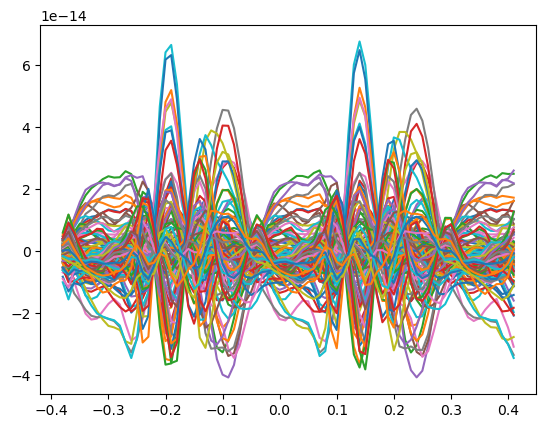

In [11]:
plt.plot(evoked.times, test.T);

In [17]:
data.shape

(102, 80)

In [12]:
?mne.read_epochs_fieldtrip

Signature:
mne.read_epochs_fieldtrip(
    fname,
    info,
    data_name='data',
    trialinfo_column=0,
)
Docstring:
Load epoched data from a FieldTrip preprocessing structure.

This function expects to find epoched data in the structure data_name is
pointing at.

.. warning:: Only epochs with the same amount of channels and samples are
             supported!

.. warning:: FieldTrip does not normally store the original information
             concerning channel location, orientation, type etc. It is
             therefore **highly recommended** to provide the info field.
             This can be obtained by reading the original raw data file
             with MNE functions (without preload). The returned object
             contains the necessary info field.

Parameters
----------
fname : path-like
    Path and filename of the ``.mat`` file containing the data.
info : dict or None
    The info dict of the raw data file corresponding to the data to import.
    If this is set to None,